In [14]:
#pip install openpyxl

# Working with Excel
From Chapter 13 of 'Automate The Boring Stuff With Python' by Al Sweigart

In [38]:
import openpyxl as pyxl
from openpyxl.utils import get_column_letter, column_index_from_string

## Reading Excel Documents
The examples in this chapter will use a spreadsheet named example.xlsx.

In [6]:
loaded_excel = pyxl.load_workbook('example.xlsx')
type(loaded_excel)

openpyxl.workbook.workbook.Workbook

---

## Getting Sheets from the Workbook


In [7]:
loaded_excel.sheetnames

['Sheet1', 'Sheet2', 'Sheet3']

In [8]:
loaded_excel.active

<Worksheet "Sheet1">

---

## Getting Cells from the Sheets

In [15]:
sheet_1 = loaded_excel['Sheet1']
print("Cell from the sheet", sheet_1['A1']) 
print("Value from cell A1: ", sheet_1['A1'].value) 
print("Value from cell B1: ", sheet_1['B1'].value)
print("Value from cell C1: ", sheet_1['C1'].value)

Cell from the sheet <Cell 'Sheet1'.A1>
Value from cell A1:  2015-04-05 13:34:02
Value from cell B1:  Apples
Value from cell C1:  73


OpenPyXL will automatically interpret the dates in column A and return them as datetime values rather than strings. The datetime data type is explained in <b>Manage Datetime</b>.

### Get a cell using the sheet’s cell() 

In [27]:
r1_c2 = sheet_1.cell(row=1, column=2)
print(r1_c2)
print("Value of row 1, column 2: ", r1_c2.value)
for i in range(1,8,2):
    print('Row ' + str(i) + ": " + sheet_1.cell(row=i, column=2).value)

<Cell 'Sheet1'.B1>
Value of row 1, column 2:  Apples
Row 1: Apples
Row 3: Pears
Row 5: Apples
Row 7: Strawberries


### Size of the sheet with the Worksheet object’s max_row and max_column attributes

In [30]:
print("Maximum row from Sheet 1: ", sheet_1.max_row)
print("Maximum column from Sheet 1: ", sheet_1.max_column)

Maximum row from Sheet 1:  7
Maximum column from Sheet 1:  3


---

## Converting Between Column Letters and Numbers

Using:<br>
    <b>- get_column_letter</b> <br>
    <b>- column_index_from_string</b>

In [40]:
print("Maximum column from Sheet 1: ", get_column_letter(sheet_1.max_column))
print("Column index from 'A': ", column_index_from_string('A'))
print("Column index from 'AA': ", column_index_from_string('AA'))

Maximum column from Sheet 1:  C
Column index from 'A':  1
Column index from 'AA':  27


<b>Make a tuple around a range of Cells, getting all the cells with their respective data</b>

In [50]:
tuple_w_cells = tuple(sheet_1['A1':'C3'])
print('Cells from A1 to C3', tuple_w_cells)

Cells from A1 to C3 ((<Cell 'Sheet1'.A1>, <Cell 'Sheet1'.B1>, <Cell 'Sheet1'.C1>), (<Cell 'Sheet1'.A2>, <Cell 'Sheet1'.B2>, <Cell 'Sheet1'.C2>), (<Cell 'Sheet1'.A3>, <Cell 'Sheet1'.B3>, <Cell 'Sheet1'.C3>))


In [58]:
#We get the initial column, which is: A1 and also, we get the final column, for that case
#we use the funcions get_column_letter(max_column) + max_row = C7 
i_c = 'A1'
f_c = get_column_letter(sheet_1.max_column) + str(sheet_1.max_row)
for row_column in sheet_1[i_c: f_c]:
    for cell in row_column:
        print(cell.coordinate, cell.value)

A1 2015-04-05 13:34:02
B1 Apples
C1 73
A2 2015-04-05 03:41:23
B2 Cherries
C2 85
A3 2015-04-06 12:46:51
B3 Pears
C3 14
A4 2015-04-08 08:59:43
B4 Oranges
C4 52
A5 2015-04-10 02:07:00
B5 Apples
C5 152
A6 2015-04-10 18:10:37
B6 Bananas
C6 23
A7 2015-04-10 02:40:46
B7 Strawberries
C7 98


----

## Writing Excel Documents

Let's create a new Workbook

In [59]:
#Create blank workbook
my_wb = pyxl.Workbook()
#It starts with one Sheet
my_wb.sheetnames

['Sheet']

sheet = my_wb.active
sheet.title

Let's change the sheet title

In [61]:
sheet.title = 'Sheet desde Python'

In [62]:
my_wb.sheetnames

['Sheet desde Python']

Let's save the workbook

In [63]:
my_wb.save('my_workbook.xlsx')

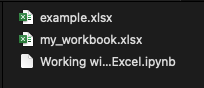
<p style='text-align: center;' >It is stored in the folder</p>

## Creating and Removing Sheets and Writing Values to Cells
Sheets can be added to and removed from a workbook with the create_sheet() method and del operator.